In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

plt.ion()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,0.962
232721,Soul,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,0.969
232722,Soul,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,0.813
232723,Soul,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,0.489


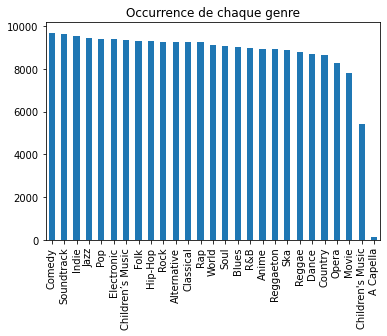

In [2]:
# Ouverture du fichier csv
name = ".data/SpotifyFeatures.csv"
data = pd.read_csv(name)

# Déselection des colonnes inutiles 
data = data.drop(columns = ['artist_name', 'track_name', 'track_id', 'time_signature']) # les caractéristiques qui ne nous intéressent pas
data['genre'].value_counts().plot(kind='bar', title = 'Occurrence de chaque genre')
data

9


,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
135,4,65,0.08300,0.724,246333,0.689,0.000000,6,0.3040,-5.922,1,0.1350,146.496,0.6930
136,4,63,0.32300,0.685,186467,0.610,0.000000,4,0.1020,-5.221,1,0.0439,94.384,0.3230
137,4,62,0.06750,0.762,199520,0.520,0.000004,9,0.1140,-5.237,1,0.0959,75.047,0.0862
138,4,61,0.36000,0.563,240597,0.366,0.002430,3,0.0955,-6.896,1,0.1210,85.352,0.7680
139,4,68,0.59600,0.653,213947,0.621,0.000000,3,0.0811,-5.721,1,0.0409,100.006,0.4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,4,39,0.00384,0.687,326240,0.714,0.544000,6,0.0845,-10.626,0,0.0316,115.542,0.9620
232721,4,38,0.03290,0.785,282447,0.683,0.000880,8,0.2370,-6.944,1,0.0337,113.830,0.9690
232722,4,47,0.90100,0.517,166960,0.419,0.000000,6,0.0945,-8.282,0,0.1480,84.135,0.8130
232723,4,44,0.26200,0.745,222442,0.704,0.000000,1,0.3330,-7.137,0,0.1460,100.031,0.4890


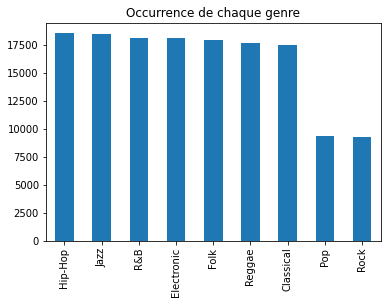

In [4]:
# Séparation des données entre les genres "World" et le reste
data_world = data.loc[data["genre"] == "World"]

# On remplace les strings par un numéro
data = data.replace(to_replace="Major", value = 0)
data = data.replace(to_replace="Minor", value = 1)
data = data.replace(to_replace="A", value = 1)
data = data.replace(to_replace="A#", value = 2)
data = data.replace(to_replace="B", value = 3)
data = data.replace(to_replace="C", value = 4)
data = data.replace(to_replace="C#", value = 5)
data = data.replace(to_replace="D", value = 6)
data = data.replace(to_replace="D#", value = 7)
data = data.replace(to_replace="E", value = 8)
data = data.replace(to_replace="F", value = 9)
data = data.replace(to_replace="F#", value = 10)
data = data.replace(to_replace="G", value = 11)
data = data.replace(to_replace="G#", value = 12)

# Suppression des classes peu pertinentes
pca = PCA(n_components = 2)
y = data["genre"] 
X = data[data.columns.difference(["genre"])]
pca.fit(X)

data = data[data.genre != 'World']
data = data[data.genre != 'Movie']
data = data[data.genre != 'Soundtrack']
data = data[data.genre != 'Anime']
data = data[data.genre != 'A Capella']
data = data[data.genre != 'Children’s Music']
data = data[data.genre != "Children's Music"]
data = data[data.genre != "Comedy"]
data = data[data.genre != "Alternative"]
data = data[data.genre != "Indie"]
data = data[data.genre != "Reggaeton"]

# On regroupe les genres musicaux similaires
data = data.replace(to_replace="Rap", value = "Hip-Hop")
data = data.replace(to_replace="Soul", value = "R&B")
data = data.replace(to_replace="Dance", value = "Electronic")
data = data.replace(to_replace="Blues", value = "Jazz")
data = data.replace(to_replace="Country", value = "Folk")
data = data.replace(to_replace="Opera", value = "Classical")
data = data.replace(to_replace="Ska", value = "Reggae")

data['genre'].value_counts().plot(kind='bar', title = 'Occurrence de chaque genre')

# Compte le nombre de genres de musique
K=data.nunique()[0]
print(K)

genres = {"Classical":0, "Electronic":1, "Folk":2, "Hip-Hop":3, "R&B":4, "Rock":5, "Jazz":6, "Reggae":7, "Pop":8}
data.genre = [genres[s] for s in data.genre]

data
# DimRepre = X.shape[1]

In [4]:
def getXY(data):
    # Mélange les datas (pour ne pas avoir des datas triées par le genre musical)
    data = data.sample(frac = 1)
    
    # Nos données finales
    y = data["genre"] 
    X = data[data.columns.difference(["genre"])]
    
    #Normaliser les valeurs (entre 0 et 1)
    X /= X.max()

    return X, y

In [5]:
import sklearn.utils

# Permet d'obtenir nos sous datas
def load_subSets(data, ratio_train, ratio_valid):
    data=sklearn.utils.shuffle(data)
    X, y = getXY(data)
    ratio_test = 1 - ratio_train - ratio_valid
    assert(ratio_test>0)
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() # X[-Ntest:] est equivalent
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [6]:
# Définition des ratios
ratio_train = 0.1
ratio_valid = 0.05

# Création des sets
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(data, ratio_train, ratio_valid)
DimRepre = X_train.shape[1]

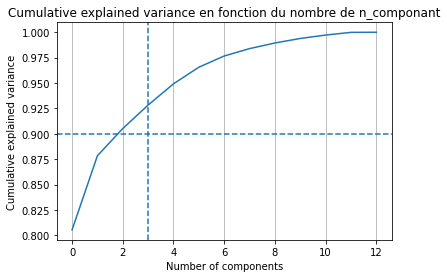

PCA(n_components=3, svd_solver='full')

In [7]:
# Définition de la variance conservée
CumulativeExplainedVarianceWanted=0.90

# Préprocessus - PCA - Réduction du nombre de "dimensions", "caractéristiques"
pca = PCA().fit(X_train) # idée de se coller aux données
CumulativeExplainedVariance = pca.explained_variance_ratio_.cumsum()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y = CumulativeExplainedVarianceWanted, linestyle = '--')
plt.axvline(x = 3, linestyle = '--')

plt.title('Cumulative explained variance en fonction du nombre de n_componant')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(axis='x')

plt.show()
n_compo = 3 # On décide de prendre 3 pour se rapprocher au plus de 0.9 de variance cumulée
preProc = PCA(n_components = n_compo, svd_solver = 'full')
preProc.fit(X_train)

In [8]:
# ## TODO: transformer les donnees selon cette transformation apprise
# X_train_Transformed = preProc.transform(X_train)
# X_valid_Transformed = preProc.transform(X_valid)

# ## TODO: faire l'apprentissage supervisé des classes ,
# ## a l'aide d'un SVM polynomial de degre 2 (et avec C=1, coef0 = 1)
# clf = SVC(C = 1, coef0 = 1, kernel='poly', degree = 2)
# clf.fit(X_train_Transformed, y_train)

# ## TODO: calculer les scores a l'aide de clf.score()
# trainscore = clf.score(X_train_Transformed,y_train)
# validscore = clf.score(X_valid_Transformed, y_valid)


In [8]:
linear_training_score = []
linear_valid_score = []
Cvalues=[]

# from sklearn.linear_model import SGDClassifier
# X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(data, ratio_train, ratio_valid)
# X_train_Transformed = preProc.transform(X_train)
# X_valid_Transformed = preProc.transform(X_valid)
# X_test_Transformed = preProc.transform(X_test)
# print('PCA done')

# #entrainer le modèle
# clf = SGDClassifier()
# clf.fit(X_train_Transformed, y_train)
# print('fit done')

# #calculer le score de train et validation
# trainscore = clf.score(X_train_Transformed, y_train)
# validscore = clf.score(X_valid_Transformed, y_valid)
# print('trainscore', trainscore)
# print('validscore', validscore)

# y_pred = clf.predict(X_test_Transformed)
# valScore = sklearn.metrics.balanced_accuracy_score(y_test, y_pred)
# print("BALANCED training score:",valScore)

for C_ in [10**x for x in range(-3,4,1)]:
    print(C_)
    
    X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(data, ratio_train, ratio_valid)
    
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    print('PCA done')
    
    #entrainer le modèle
    
    
    clf = SVC(C = C_, coef0 = 1, kernel='poly', degree = 2, decision_function_shape='ovo')
    clf.fit(X_train_Transformed, y_train)
    print('fit done')
    
    #calculer le score de train et validation
    trainscore = clf.score(X_train_Transformed, y_train)
    validscore = clf.score(X_valid_Transformed, y_valid)
    print('trainscore', trainscore)
    print('validscore', validscore)

    linear_training_score.append(trainscore)
    linear_valid_score.append(   validscore)
    Cvalues.append(C_)
    

# Déterminer le C le plus robuste / Le plus intéressant.
# Refaire les manipulations avec le C et le n_component intéressants


0.001
PCA done
fit done
trainscore 0.25250086236633323
validscore 0.24575686490961776
0.01
PCA done
fit done
trainscore 0.28120041393583994
validscore 0.2758382779080999
0.1
PCA done
fit done
trainscore 0.2785098309761987
validscore 0.2780460880364289
1
PCA done
fit done
trainscore 0.2780958951362539
validscore 0.288671174279012
10
PCA done
fit done
trainscore 0.28333908244222145
validscore 0.27528632537601766
100
PCA done
fit done
trainscore 0.29920662297343914
validscore 0.2946046639988961
1000
PCA done
fit done
trainscore 0.3259744739565367
validscore 0.3119911687594867


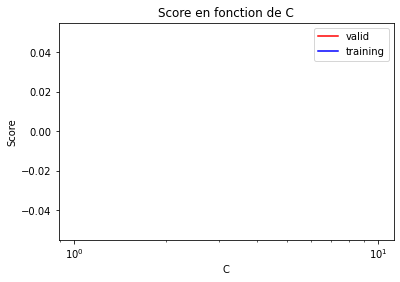

In [10]:
plt.plot(Cvalues, linear_valid_score, color = 'r', label='valid')
plt.plot(Cvalues, linear_training_score, color = 'b', label='training')
plt.legend()
plt.xscale("log")
plt.title('Score en fonction de C')
plt.xlabel('C')
plt.ylabel('Score')

plt.show()

In [11]:
# On souhaite comparer notre C le plus optimal avec celui identifié par un package
import sklearn.model_selection


In [12]:
import sklearn.metrics
X_test_Transformed = preProc.transform(X_test)
y_pred = clf.predict(X_test_Transformed)
valScore = sklearn.metrics.balanced_accuracy_score(y_test, y_pred)
print("BALANCED training score:",valScore)

BALANCED training score: 0.22510346513744706


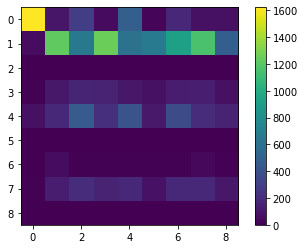

In [13]:
sklearn.metrics.accuracy_score(y_pred, y_test)
confmat = sklearn.metrics.confusion_matrix(y_pred, y_test)
plt.imshow(confmat) ## imshow plutot que contourf, pour ne pas lisser les valeurs.
plt.colorbar() ## pour montrer l'échelle, sur la droite

In [14]:
# 0.001
# ici
# y_pred [4 4 4 ... 4 4 4]
# trainscore 0.07043303271968399
# validscore 0.07021466905187836
# 0.01
# ici
# y_pred [9 4 4 ... 4 4 4]
# trainscore 0.07438324513676679
# validscore 0.07647584973166369
# 0.1
# ici
# y_pred [4 5 4 ... 4 4 4]
# trainscore 0.07602295595140493
# validscore 0.07051282051282051
# 1
# ici
# y_pred [4 4 4 ... 4 4 9]
# trainscore 0.07669374673921145
# validscore 0.07319618366129994
# 10
# ici
# y_pred [ 5  4  4 ... 24  4  4]
# trainscore 0.11202206156368785
# validscore 0.11210494931425163
# 100
# ici
# y_pred [5 4 4 ... 4 4 4]
# trainscore 0.11470522471491391
# validscore 0.11374478234943351
# 1000
# ici
# y_pred [ 4  4 16 ...  4  4 24]
# trainscore 0.12923902511738838
# validscore 0.12298747763864043
# 10000
# ici
# y_pred [10 20  4 ... 16  4  6]
# trainscore 0.14802116717597077
# validscore 0.1398330351818724
# 100000
# ici

In [15]:
import sklearn.svm
linear_training_score = []
linear_valid_score = []
X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X, ratio_train, ratio_valid)

# Nos hyperparamètres
C_ = 1
Coef_ = 1
Kernel_ = 'rbf'
Degree_ = 2


nComp_range = np.arange(1,DimRepre, 2)
for nC in nComp_range:
    preProc = sklearn.decomposition.PCA(n_components = int(nC), svd_solver = 'auto') ## TODO
    preProc.fit(X_train)
    
    ## TODO: transformer les donnees selon cette transformation apprise
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    #inTr = preProc.inverse_transform(tr)
    
    clf = sklearn.svm.SVC(C = C_, coef0 = Coef_ , kernel=Kernel_, degree = Degree_)
    clf.fit(X_train_Transformed, y_train)
    ## TODO: calculer les scores a l'aide de clf.score()
    trainscore = clf.score(X_train_Transformed,y_train)
    validscore = clf.score(X_valid_Transformed, y_valid)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)


NameError: name 'X' is not defined

In [ ]:
## plot des scores en fonction de l'hyper-param. nc
minY = 0.0
maxY = 1

plt.figure()
plt.plot(nComp_range, linear_training_score, label= "train score")
plt.plot(nComp_range, linear_valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([minY , maxY])

In [ ]:
## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte d el'overfitting, etc:
## il peut etre affiné a la main
bestIndex = np.argmax(linear_valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')

In [ ]:
## grid search: ici on va chercher a optimiser a la fois nC et 1 parametre du classifieur ##
architecture = 'SVM'

if architecture == 'SVM':
    nComp_range = np.arange(1,DimRepre,2)
    hyperParam_range = [10**k  for k in range(-4,4,1)]
    kernel = 'poly'
    degree = 2
else:
    nComp_range = np.arange(1,DimRepre,2)
    hyperParam_range = [1,2,3,4,5,7,11]

array_training_score = np.zeros( (len(nComp_range), len(hyperParam_range)) )
array_validati_score = np.zeros( (len(nComp_range), len(hyperParam_range)) )

X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(X, ratio_train, ratio_valid)

In [ ]:
for i, nC in enumerate(nComp_range):
    preProc = sklearn.decomposition.PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)

    for j, mu in enumerate(hyperParam_range):
        if architecture == 'SVM':
            C = mu
            clf = sklearn.svm.SVC(C=C, kernel=kernel, degree = degree, coef0 = 1)
        elif architecture == 'KNN':
            n_neighbors = mu
            clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')

        clf.fit(X_train_Transformed, y_train)
        trainscore = clf.score(X_train_Transformed,y_train)
        validscore = clf.score(X_valid_Transformed,y_valid)
        # print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
        array_training_score[i,j] = trainscore
        array_validati_score[i,j] = validscore



### trace de la figure ###
plt.figure()
levels=np.array([0.5,0.6,0.7,0.8,0.9,0.95,1])
# levels=np.arange(0.8,1.0,0.01) ## pour un trace plus fin
plt.contourf(array_validati_score, levels=levels)
if architecture=='SVM':
    nameofHyperParam = 'C (SVM)'
else:
    nameofHyperParam = 'k (k-NN)'

plt.xlabel("hyper-param "+nameofHyperParam)
xtick = np.arange(len(hyperParam_range))
plt.xticks(xtick, hyperParam_range)
plt.ylabel("num. of Comp (PCA)")
ytick = np.arange(len(nComp_range))
plt.yticks(ytick, nComp_range)
plt.colorbar()
indice_max = np.unravel_index(np.argmax(array_validati_score, axis=None), array_validati_score.shape)
plt.scatter(indice_max[1],indice_max[0] , marker='X', color='red')
plt.savefig("hyper-param-tuning_arci="+architecture+".png")